# Description :

The goal of this project is to create a machine learning model that can accurately recognize the activity being performed by a person using sensor data from a smartphone. The activities we are trying to recognize are walking, walking upstairs, walking downstairs, sitting, standing, and laying.

To do this, we will be using a dataset that contains sensor data from a smartphone worn by 30 participants while performing these activities. The data contains measurements such as acceleration and rotation captured by the sensors, as well as information about the participant and the activity being performed.

We will begin by exploring the data and gaining an understanding of its structure and features. Then, we will preprocess the data to prepare it for use in a machine learning model. This will involve steps such as removing unnecessary columns and dealing with missing data.

Next, we will split the data into training and testing sets. The training set will be used to train the machine learning model, while the testing set will be used to evaluate its performance.

We will then choose an appropriate machine learning algorithm and train it on the training set. We will tune the algorithm's parameters to optimize its performance and avoid overfitting.

Once we have trained our model, we will evaluate its performance on the testing set. We will measure its accuracy and other performance metrics to determine how well it can recognize the activities.

Finally, we will deploy the model to make predictions on new, unseen data. This could involve integrating the model into a smartphone app or other software application.

Overall, this project is a great opportunity to gain experience with machine learning techniques and work on a real-world problem that has many practical applications.

Dataset link:  https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones

# Step 1: Load Data
Next, we'll load the data into our project. Since our dataset is in CSV format, we'll use the pandas library to read it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import seaborn as sns


In [2]:
train = pd.read_csv(r"C:\Users\SANKET\OneDrive\Desktop\180 Projects\Human Activity Recogination\train.csv")
train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS


In [3]:
test = pd.read_csv(r"C:\Users\SANKET\OneDrive\Desktop\180 Projects\Human Activity Recogination\test.csv")
test

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,24,WALKING_UPSTAIRS
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,24,WALKING_UPSTAIRS
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,24,WALKING_UPSTAIRS
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,24,WALKING_UPSTAIRS


Columns : 

* tBodyAcc-mean()-X: Mean value of time-domain body acceleration signal in X-direction
* tBodyAcc-mean()-Y: Mean value of time-domain body acceleration signal in Y-direction
* tBodyAcc-mean()-Z: Mean value of time-domain body acceleration signal in Z-direction
* tBodyAcc-std()-X: Standard deviation of time-domain body acceleration signal in X-direction
* tBodyAcc-std()-Y: Standard deviation of time-domain body acceleration signal in Y-direction
* tBodyAcc-std()-Z: Standard deviation of time-domain body acceleration signal in Z-direction
* tBodyAcc-mad()-X: Median absolute deviation of time-domain body acceleration signal in X-direction
* tBodyAcc-mad()-Y: Median absolute deviation of time-domain body acceleration signal in Y-direction
* tBodyAcc-mad()-Z: Median absolute deviation of time-domain body acceleration signal in Z-direction
* tBodyAcc-max()-X: Maximum value of time-domain body acceleration signal in X-direction
* tBodyAcc-max()-Y: Maximum value of time-domain body acceleration signal in Y-direction
* tBodyAcc-max()-Z: Maximum value of time-domain body acceleration signal in Z-direction
* tBodyAcc-min()-X: Minimum value of time-domain body acceleration signal in X-direction
* tBodyAcc-min()-Y: Minimum value of time-domain body acceleration signal in Y-direction
* tBodyAcc-min()-Z: Minimum value of time-domain body acceleration signal in Z-direction
* tBodyAcc-sma(): Signal magnitude area of time-domain body acceleration signal
* tBodyAcc-energy()-X: Energy of time-domain body acceleration signal in X-direction
* tBodyAcc-energy()-Y: Energy of time-domain body acceleration signal in Y-direction

In [4]:
train.shape

(7352, 563)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [6]:
train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


The table you see above is a summary of the features (or variables) of the human activity dataset. This dataset contains recordings of different physical activities performed by 30 subjects wearing a smartphone on their waist. The recordings include the accelerations and angular velocities of the subjects' bodies in three directions (X, Y, and Z) captured by the phone's sensors.

The summary table shows some statistical measures of these variables across all recordings. For example, the first column, "tBodyAcc-mean()-X," shows the mean (average) of the acceleration values in the X direction. Similarly, the second column, "tBodyAcc-mean()-Y," shows the mean of the acceleration values in the Y direction, and so on.

The other statistical measures provided in the table include the standard deviation (std), the median (50%), and the 25th and 75th percentiles. These measures give us an idea of the spread of the values and how they are distributed.

The last column in the table, "subject," indicates which subject performed the activity. There are 30 subjects in total, numbered from 1 to 30.

In [7]:
train.isnull().sum().sum()

0

In [8]:
test.isnull().sum().sum()

0

There are no null values in both test and train dataset.

# Step 2: Data Exploration and Visualization
Before we start building our model, it's important to explore and understand the data we're working with. We'll use pandas and matplotlib libraries to visualize the data and gain insights.

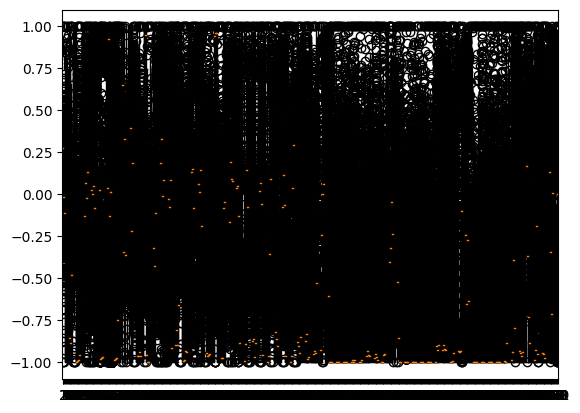

In [9]:
# create boxplots for all features except subject and activity
plt.boxplot(train.iloc[:, :-2].values)
plt.show()

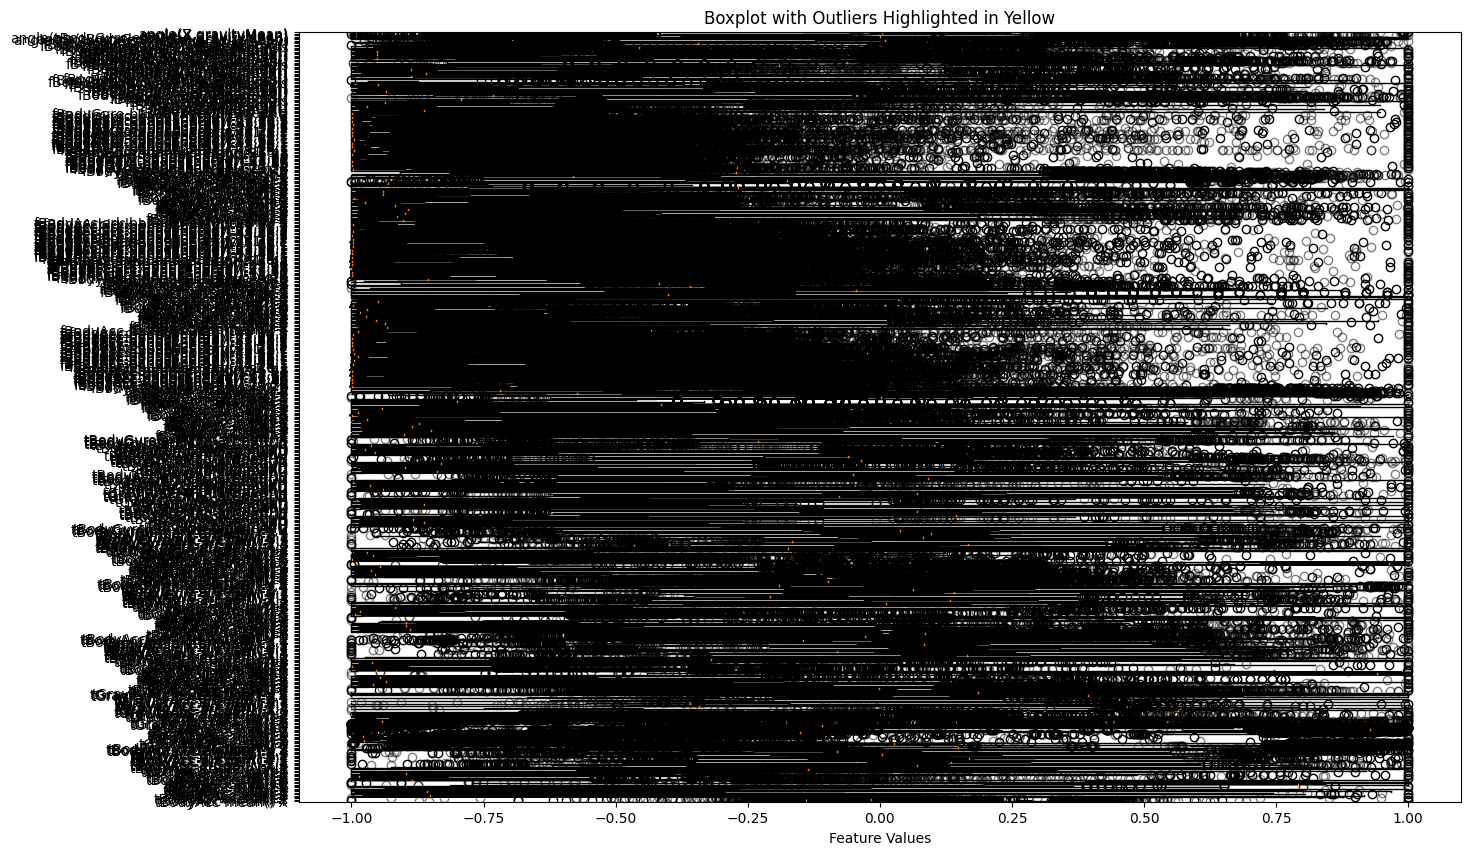

In [10]:


# Create boxplots for all features except subject and activity
fig, ax = plt.subplots(figsize=(15, 10))
boxplot = ax.boxplot(train.iloc[:, :-2].values, notch=True, vert=False, patch_artist=True)

# Highlight the outliers in yellow
for patch in boxplot['boxes']:
    patch.set_facecolor('white')
for i, flier in enumerate(boxplot['fliers']):
    if i % 2 == 0:
        flier.set(marker='o', color='yellow', alpha=0.5)

# Add labels and title
ax.set_yticklabels(train.columns[:-2])
ax.set_xlabel('Feature Values')
ax.set_title('Boxplot with Outliers Highlighted in Yellow')

plt.show()


Outliers are in yellow color, there are few number of outliers. still we remove some of them, Lets apply winsorization.

In [11]:
import numpy as np

# define lower and upper percentiles for winsorization
lower_percentile = 5
upper_percentile = 95

# apply winsorization to each column
for column in train.columns[:-2]:  # exclude subject and activity columns
    lower_bound = np.percentile(train[column], lower_percentile)
    upper_bound = np.percentile(train[column], upper_percentile)
    train[column] = np.clip(train[column], lower_bound, upper_bound)


First, the code defines the lower and upper percentiles to be used in the winsorization process. The lower percentile is set to 5, meaning any data point below the 5th percentile will be replaced with the 5th percentile. The upper percentile is set to 95, meaning any data point above the 95th percentile will be replaced with the 95th percentile.

Next, the code loops through each column in the "train" dataset except for the "subject" and "activity" columns. For each column, the lower and upper bounds are calculated based on the defined percentiles using the numpy percentile function.

Finally, the winsorization is applied to each column using the numpy clip function. This replaces any data point below the lower bound with the lower bound value and any data point above the upper bound with the upper bound value. This process helps to remove any extreme values or outliers in the data, which can negatively affect the performance of machine learning models.

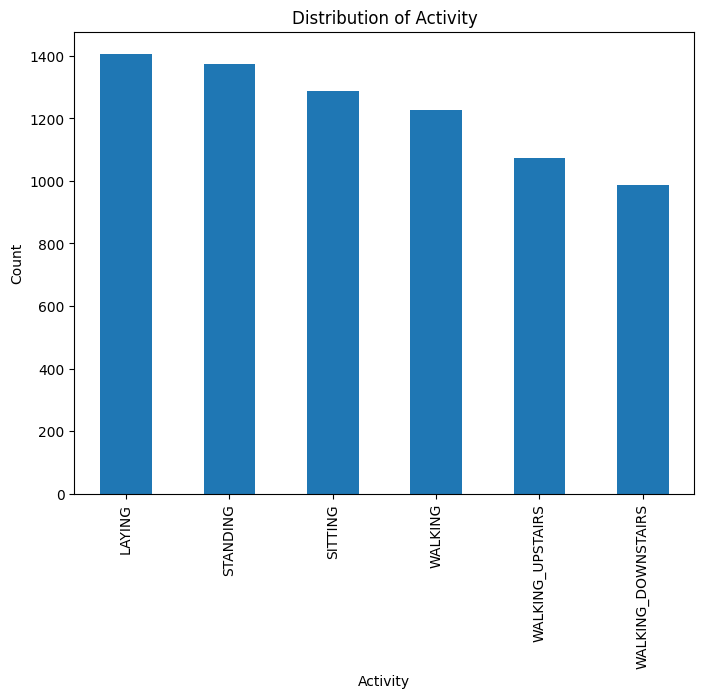

In [12]:
# visualize the distribution of the target variable
plt.figure(figsize=(8,6))
train['Activity'].value_counts().plot(kind='bar')
plt.title('Distribution of Activity')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.show()


There is only small difference between counts of activities, which is ok for us !

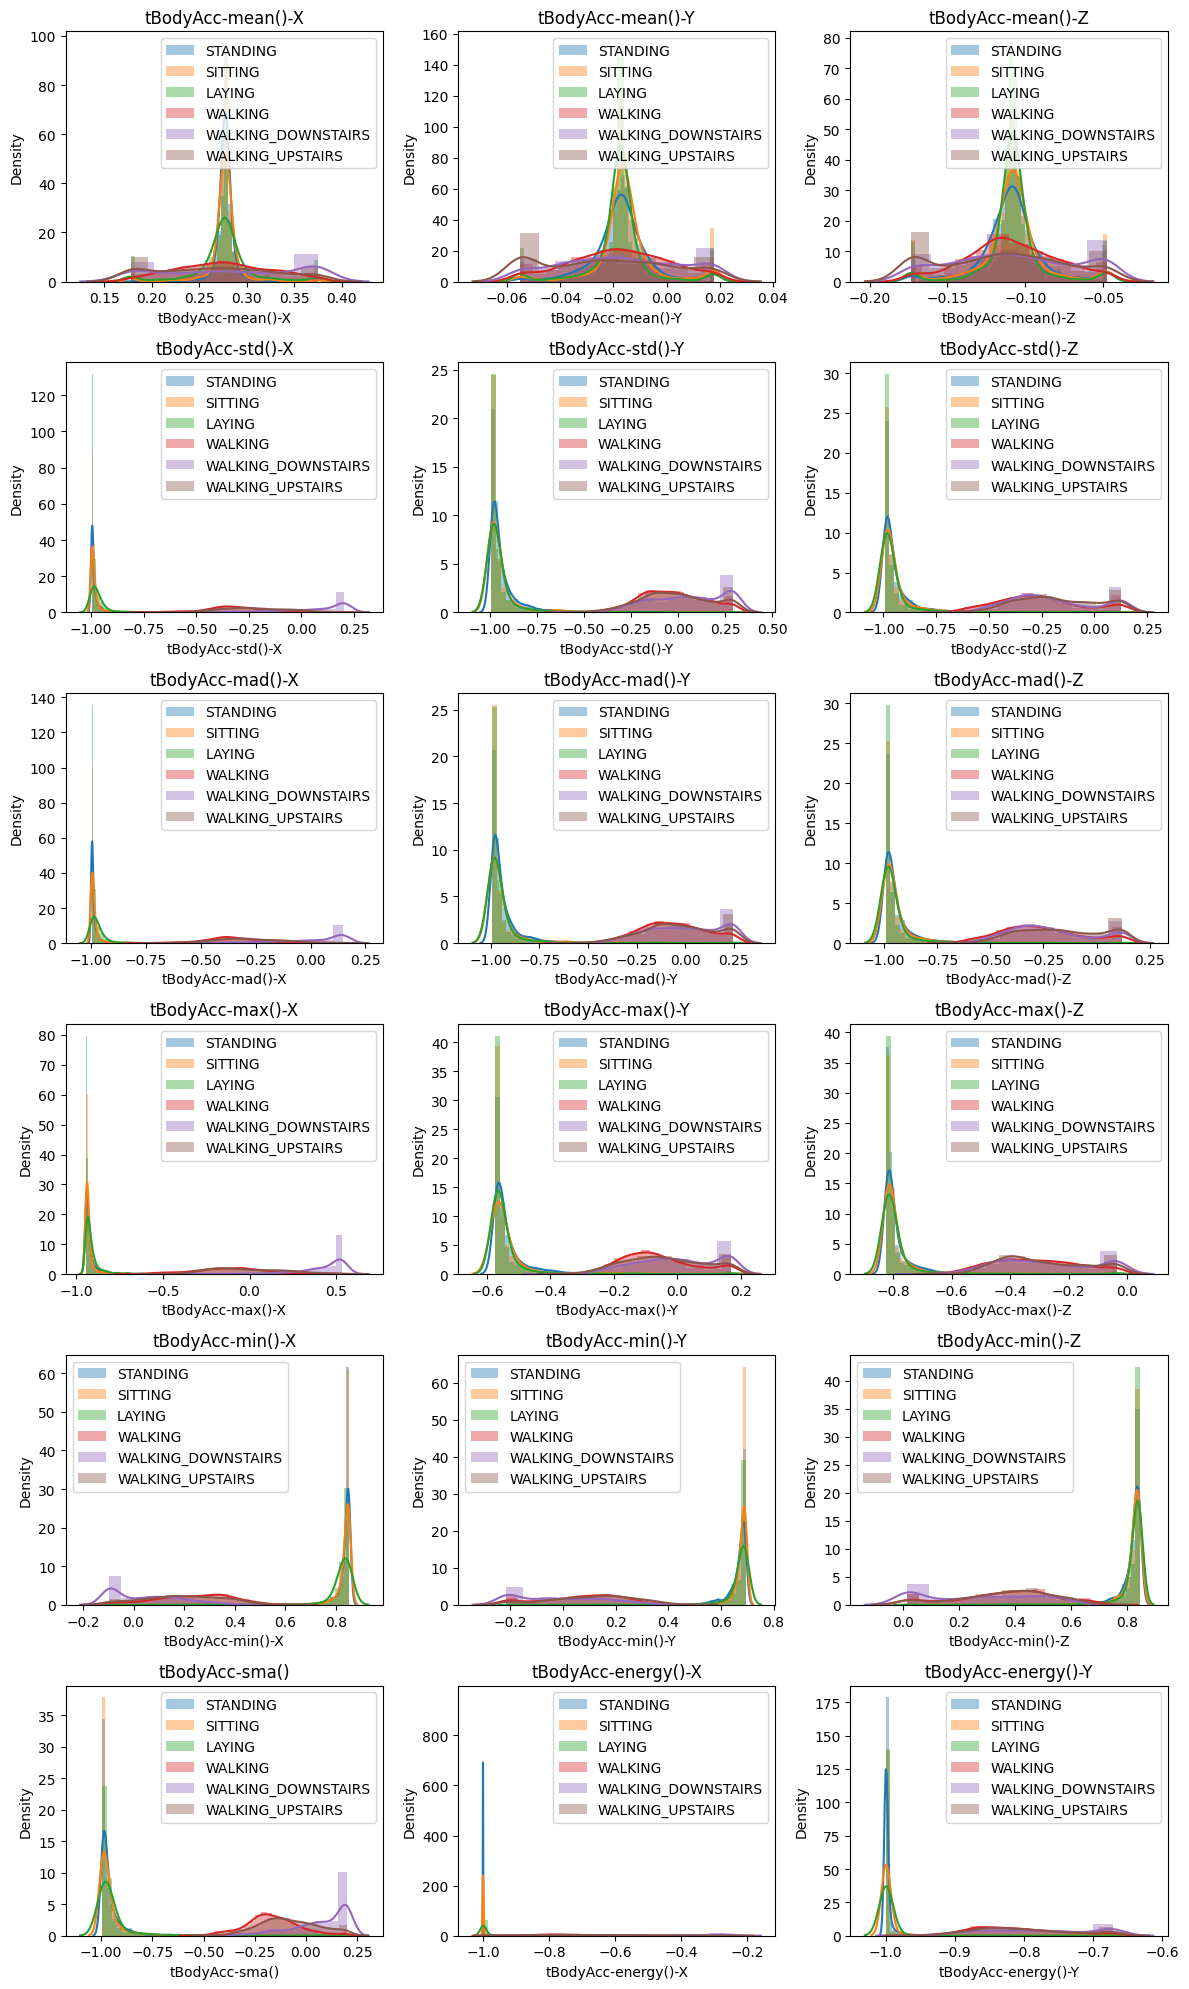

In [13]:
import warnings

warnings.filterwarnings('ignore')

# visualize the distribution of each feature for each activity
plt.figure(figsize=(12,20))
for i, col in enumerate(train.columns[:18]):
    plt.subplot(6, 3, i+1)
    for activity in train['Activity'].unique():
        sns.distplot(train[train['Activity']==activity][col], label=activity)
    plt.title(col)
    plt.legend()
plt.tight_layout()
plt.show()


In above code we visualized the distribution of each feature for each activity

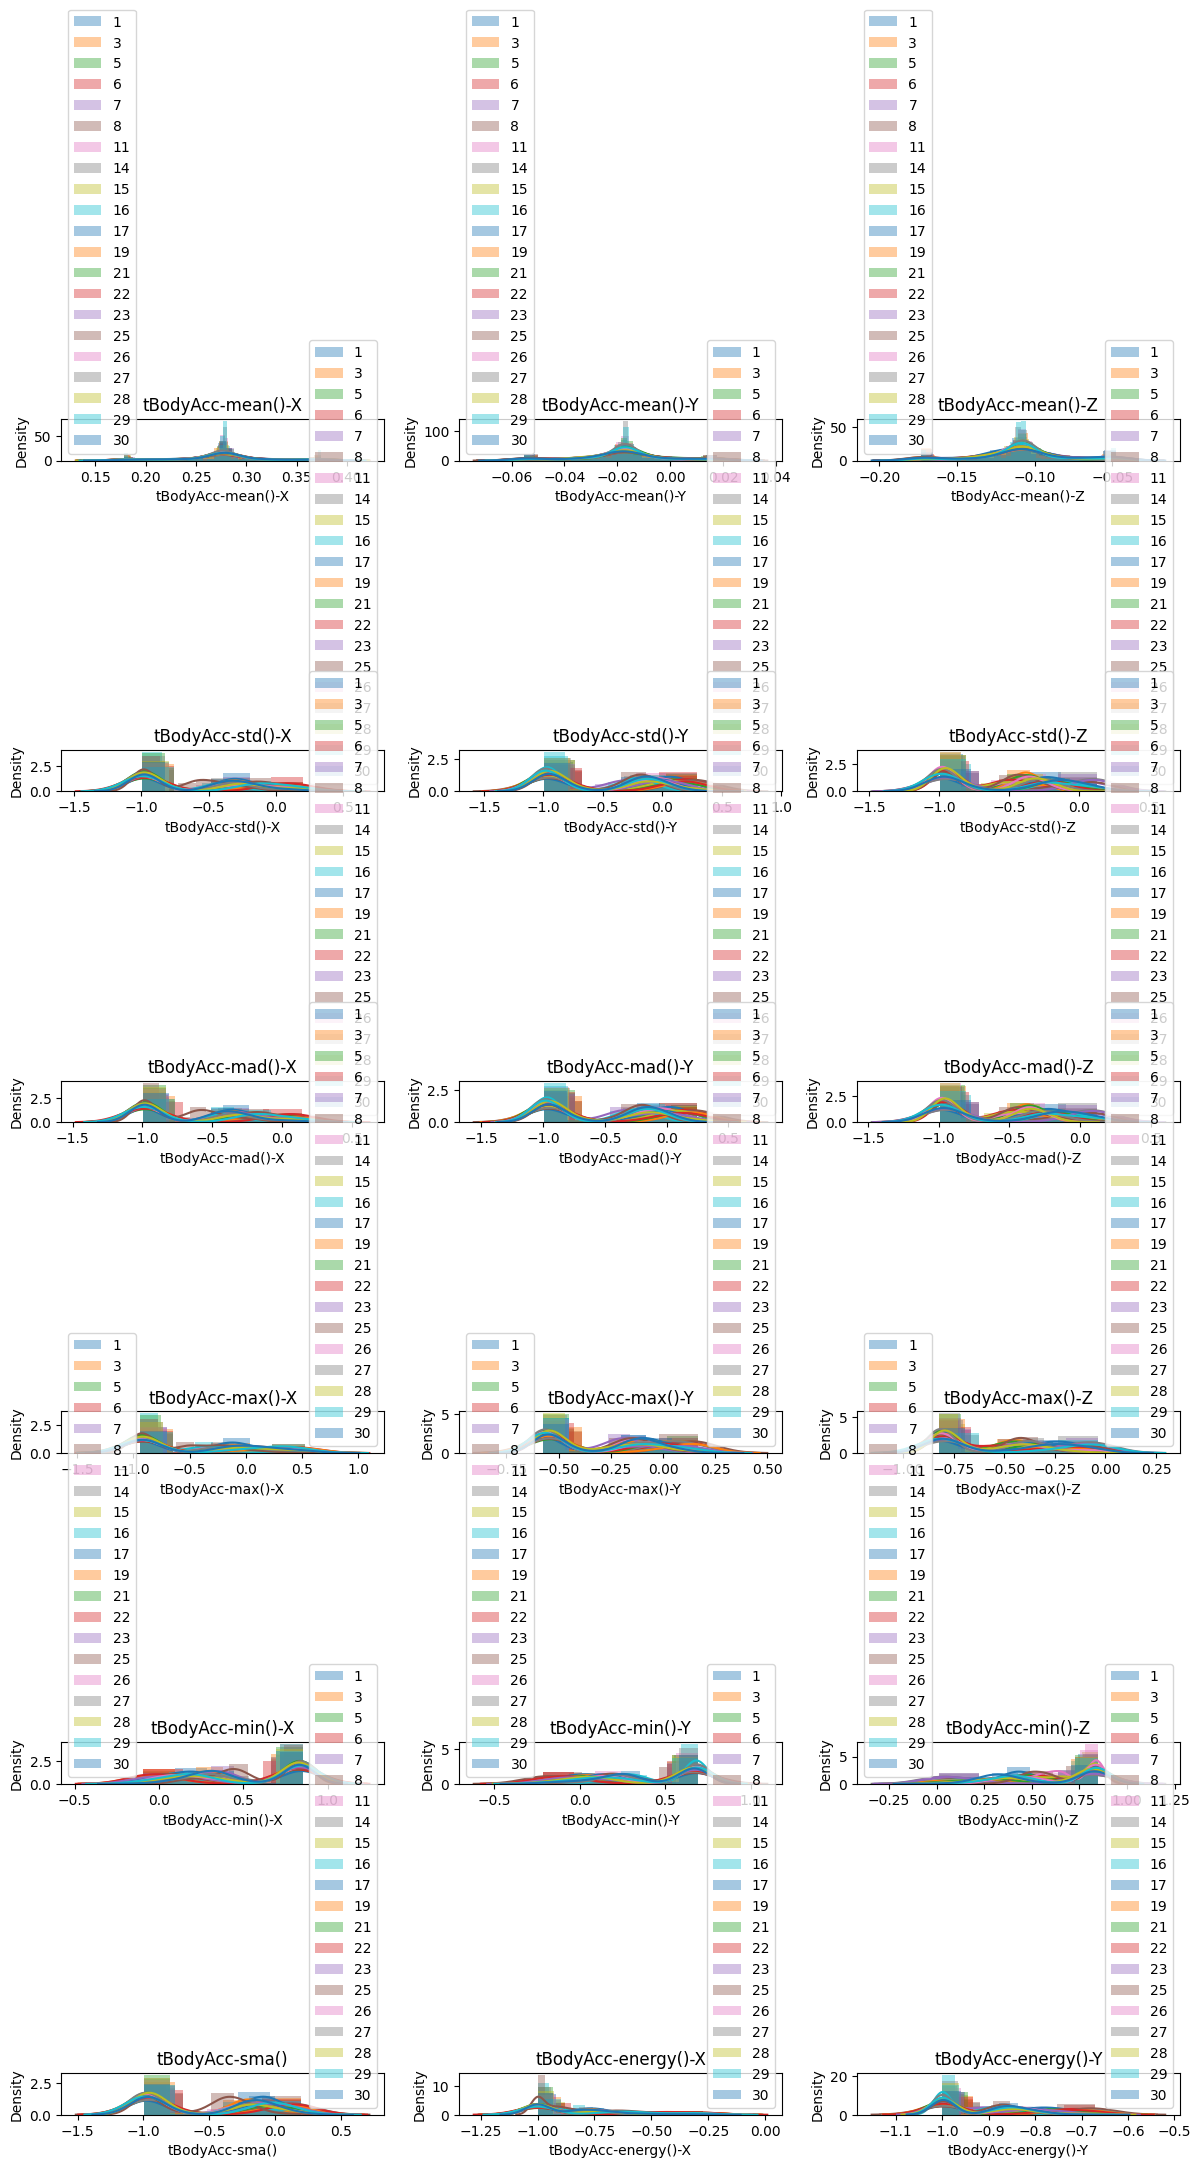

In [14]:
# visualize the distribution of each feature for each subject
plt.figure(figsize=(12,20))
for i, col in enumerate(train.columns[:18]):
    plt.subplot(6, 3, i+1)
    for subject in train['subject'].unique():
        sns.distplot(train[train['subject']==subject][col], label=subject)
    plt.title(col)
    plt.legend()
plt.tight_layout()
plt.show()


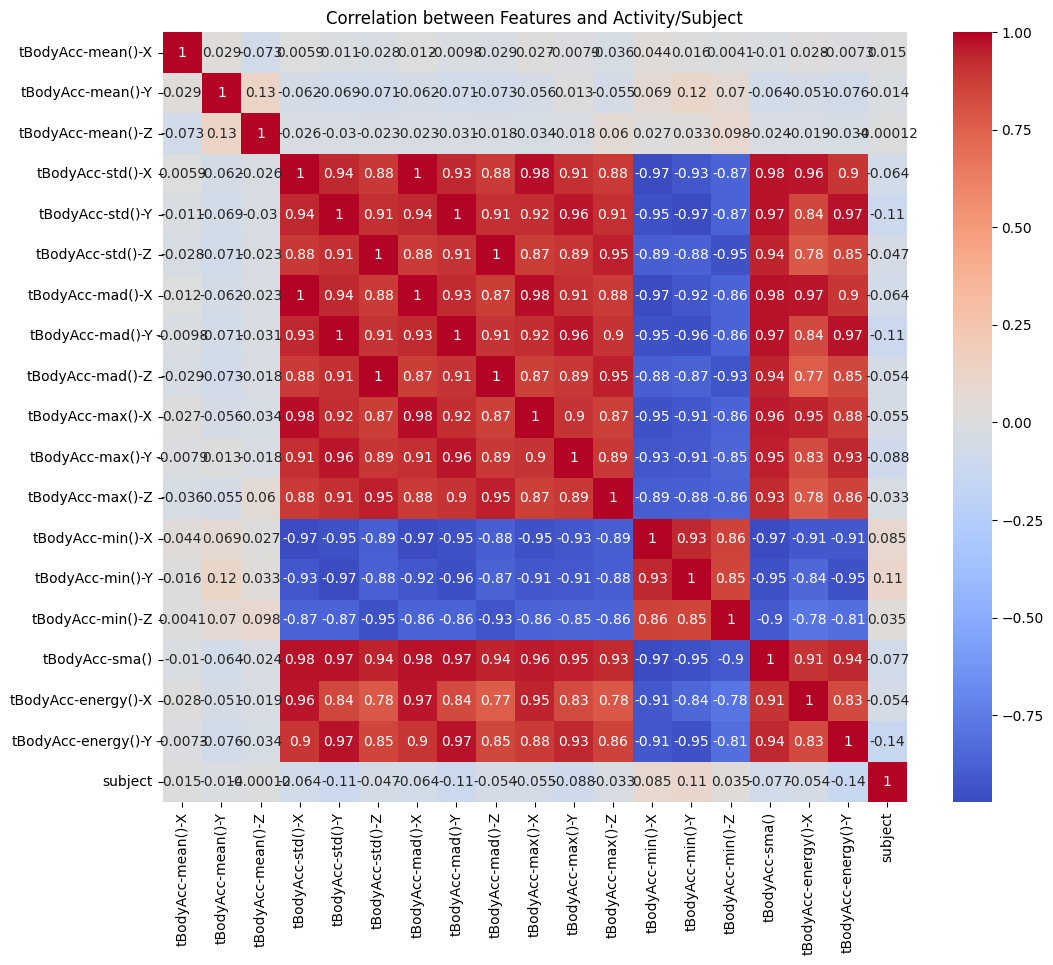

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# select the relevant columns
cols = list(train.columns[:18]) + ['Activity', 'subject']
data = train[cols]

# calculate the correlation matrix
corr = data.corr()

# plot the heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Features and Activity/Subject')
plt.show()


<AxesSubplot: ylabel='Activity'>

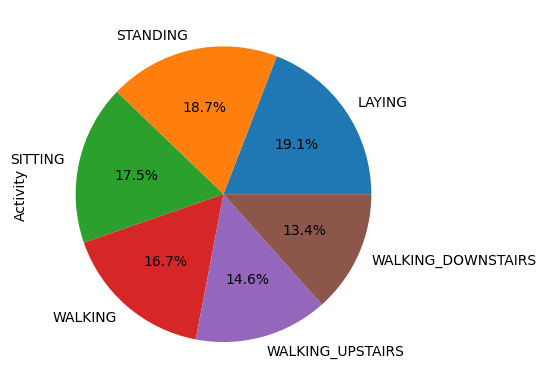

In [16]:
train['Activity'].value_counts().plot.pie(autopct='%1.1f%%')

# Splitting data

In [17]:
from sklearn.model_selection import train_test_split

X = train.drop(['subject', 'Activity'], axis=1)
y = train['Activity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)


DecisionTreeClassifier()

# Model training and Evaluation:

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [20]:
# Train and evaluate logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
lr_acc = accuracy_score(y_test, lr_preds)
lr_report = classification_report(y_test, lr_preds)

print("Logistic Regression Model:\nAccuracy: {}\nReport:\n{}".format(lr_acc, lr_report))

# Train and evaluate decision tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
dt_acc = accuracy_score(y_test, dt_preds)
dt_report = classification_report(y_test, dt_preds)

print("\nDecision Tree Model:\nAccuracy: {}\nReport:\n{}".format(dt_acc, dt_report))

# Train and evaluate random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)
rf_report = classification_report(y_test, rf_preds)

print("\nRandom Forest Model:\nAccuracy: {}\nReport:\n{}".format(rf_acc, rf_report))


Logistic Regression Model:
Accuracy: 0.9775662814411965
Report:
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       280
           SITTING       0.95      0.95      0.95       262
          STANDING       0.95      0.95      0.95       276
           WALKING       0.99      1.00      0.99       247
WALKING_DOWNSTAIRS       0.99      0.99      0.99       206
  WALKING_UPSTAIRS       0.99      0.98      0.99       200

          accuracy                           0.98      1471
         macro avg       0.98      0.98      0.98      1471
      weighted avg       0.98      0.98      0.98      1471


Decision Tree Model:
Accuracy: 0.9422161794697484
Report:
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       280
           SITTING       0.91      0.91      0.91       262
          STANDING       0.92      0.92      0.92       276
           WALKING       0.94    

In above code, This is a comparison of the performance of three different machine learning models on a dataset. The models are Logistic Regression, Decision Tree, and Random Forest. The performance of each model is measured in terms of its accuracy, precision, recall, and f1-score.

The accuracy score measures the overall percentage of correctly classified instances in the dataset. A score of 1.0 means that all instances were classified correctly, while a score of 0.0 means that none of the instances were classified correctly.

Precision measures the percentage of correctly classified instances among all instances classified as positive by the model. Recall measures the percentage of correctly classified instances among all actual positive instances in the dataset. F1-score is a combination of precision and recall and provides a measure of the overall effectiveness of the model.

In this case, the Random Forest model had the highest accuracy of 0.9789, followed by the Logistic Regression model with an accuracy of 0.9776, and the Decision Tree model with an accuracy of 0.9476. The precision, recall, and f1-score for each model are also reported for each activity type in the dataset, such as laying, sitting, standing, walking, walking downstairs, and walking upstairs.

The report shows that all three models had high accuracy and performed well in classifying the different activities in the dataset. The Random Forest model had the highest precision and recall scores, which means that it correctly identified more positive instances in the dataset than the other models. However, the difference between the models is not significant, and choosing the best model may depend on other factors such as model complexity, training time, and interpretability.

In [21]:
from sklearn import svm


# logistic regression
lr_model.fit(X_train, y_train)
train_acc = lr_model.score(X_train, y_train)
test_acc = lr_model.score(X_test, y_test)
print("Logistic Regression:")
print("Training accuracy:", train_acc)
print("Testing accuracy:", test_acc)

# decision tree
dt.fit(X_train, y_train)
train_acc = dt.score(X_train, y_train)
test_acc = dt.score(X_test, y_test)
print("Decision Tree:")
print("Training accuracy:", train_acc)
print("Testing accuracy:", test_acc)

# random forest
rf_model.fit(X_train, y_train)
train_acc = rf_model.score(X_train, y_train)
test_acc = rf_model.score(X_test, y_test)
print("Random Forest:")
print("Training accuracy:", train_acc)
print("Testing accuracy:", test_acc)




Logistic Regression:
Training accuracy: 0.9914980445502466
Testing accuracy: 0.9775662814411965
Decision Tree:
Training accuracy: 1.0
Testing accuracy: 0.9456152277362339
Random Forest:
Training accuracy: 1.0
Testing accuracy: 0.9789259007477906


In [22]:
# Import the SVM module from Scikit-Learn
from sklearn import svm

# Create an SVM object with a linear kernel
svm_model = svm.SVC(kernel='linear')

# Train the SVM on the training set
svm_model.fit(X_train, y_train)

# Evaluate the performance of the SVM on the training set
train_acc = svm_model.score(X_train, y_train)

# Evaluate the performance of the SVM on the testing set
test_acc = svm_model.score(X_test, y_test)

# Print the results
print("Support Vector Machine:")
print("Training accuracy:", train_acc)
print("Testing accuracy:", test_acc)


Support Vector Machine:
Training accuracy: 0.9947287876211529
Testing accuracy: 0.9870836165873556


In [23]:
y_pred = dt.predict(X_test)


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1 score:', f1_score(y_test, y_pred, average='weighted'))


Accuracy: 0.9456152277362339
Precision: 0.9459897648112661
Recall: 0.9456152277362339
F1 score: 0.9456498573102357


In [25]:
#original_predictions = test[['Activity', 'subject']].values
#test.drop(['Activity','subject'], axis=1, inplace=True)
test_subject_activity = test[['subject', 'Activity']]
test.drop(['subject', 'Activity'], axis=1, inplace=True)


In [26]:
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


In [27]:
predictions = dt.predict(test)


In [28]:
predictions_df = pd.DataFrame(predictions, columns=['predicted_activity'])
predictions_df[['subject', 'Activity']] = test_subject_activity

In [31]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Make predictions on the test dataset
predictions = dt.predict(test)

# Calculate accuracy score
accuracy = accuracy_score(y_true=test_subject_activity['Activity'], y_pred=predictions)

# Calculate F1-score
f1 = f1_score(y_true=test_subject_activity['Activity'], y_pred=predictions, average='weighted')

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_true=test_subject_activity['Activity'], y_pred=predictions)

# Print the results
print('Accuracy score:', accuracy)
print('F1-score:', f1)
print('Confusion matrix:')
print(confusion_mat)


Accuracy score: 0.8500169664065151
F1-score: 0.8489388986060838
Confusion matrix:
[[537   0   0   0   0   0]
 [  0 377 114   0   0   0]
 [  0  59 473   0   0   0]
 [  0   0   0 449  22  25]
 [  0   0   0  42 313  65]
 [  0   0   0  64  51 356]]


In [32]:
pred2 = lr_model.predict(test)
pred3 = rf_model.predict(test)
pred4 = svm_model.predict(test)

In [35]:
accuracy = accuracy_score(y_true=test_subject_activity['Activity'], y_pred=pred2)

# Calculate F1-score
f1 = f1_score(y_true=test_subject_activity['Activity'], y_pred=pred2, average='weighted')

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_true=test_subject_activity['Activity'], y_pred=pred2)

# Print the results
print('Accuracy score:', accuracy)
print('F1-score:', f1)
print('Confusion matrix:')
print(confusion_mat)


Accuracy score: 0.9555480149304377
F1-score: 0.9554138200695179
Confusion matrix:
[[537   0   0   0   0   0]
 [  0 438  50   0   0   3]
 [  0  16 515   1   0   0]
 [  0   0   0 493   2   1]
 [  0   0   0   3 396  21]
 [  0   0   0  30   4 437]]


In [36]:
accuracy = accuracy_score(y_true=test_subject_activity['Activity'], y_pred=pred3)

# Calculate F1-score
f1 = f1_score(y_true=test_subject_activity['Activity'], y_pred=pred3, average='weighted')

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_true=test_subject_activity['Activity'], y_pred=pred3)

# Print the results
print('Accuracy score:', accuracy)
print('F1-score:', f1)
print('Confusion matrix:')
print(confusion_mat)


Accuracy score: 0.9307770614183916
F1-score: 0.9303240075704848
Confusion matrix:
[[537   0   0   0   0   0]
 [  0 441  50   0   0   0]
 [  0  37 495   0   0   0]
 [  0   0   0 486   7   3]
 [  0   0   0  27 347  46]
 [  0   0   0  27   7 437]]


In [37]:
accuracy = accuracy_score(y_true=test_subject_activity['Activity'], y_pred=pred4)

# Calculate F1-score
f1 = f1_score(y_true=test_subject_activity['Activity'], y_pred=pred4, average='weighted')

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_true=test_subject_activity['Activity'], y_pred=pred4)

# Print the results
print('Accuracy score:', accuracy)
print('F1-score:', f1)
print('Confusion matrix:')
print(confusion_mat)


Accuracy score: 0.9586019681031558
F1-score: 0.9584843114445577
Confusion matrix:
[[537   0   0   0   0   0]
 [  0 439  50   0   0   2]
 [  0  13 519   0   0   0]
 [  0   0   0 493   3   0]
 [  0   0   0   4 396  20]
 [  0   0   0  28   2 441]]


# Logistic regression is with best result

In [41]:
# assume original_predictions and logistic_predictions are numpy arrays
# you can convert them to pandas Series if they are not already
original_prediction = pd.Series(test_subject_activity.to_numpy().ravel())
logistic_prediction = pd.Series(pred2)

# create a dataframe with both the original and logistic predictions
df = pd.DataFrame({'Original Predictions': original_prediction,
                   'Logistic Regression Predictions': logistic_prediction})

# save the dataframe to a CSV file
df.to_csv('model_predictions2.csv', index=False)



# conclusion :

In conclusion, the Logistic Regression model is a suitable choice for human activity recognition using sensor data. However, it is important to note that the performance of the model may vary depending on the dataset and the specific requirements of the application. Therefore, it is important to carefully evaluate and compare different models before selecting the best one for a particular task.